#### Importing the dependencies

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#### Data Collection and Preprocessing

In [3]:
# loading dataset in pandas dataframe
loan_data = pd.read_csv("./loan_data.csv")

In [4]:
# printing the shape of dataset
print(f"(rows, columns): {loan_data.shape}")

(rows, columns): (614, 13)


In [5]:
# printing first five rows of dataset
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
# getting statistical description of dataset
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
# printing last five rows of dataset
loan_data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [8]:
# getting more information about dataset
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
# checking for missing values in dataset
loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### Handling Missing Values

In [10]:
# dropping the missing values
loan_data = loan_data.dropna()

In [11]:
loan_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [12]:
loan_data.replace({'Loan_Status': {'N': 0, 'Y': 1}}, inplace=True)

In [13]:
loan_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


In [14]:
# count values of "Dependents" column
loan_data["Dependents"].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [15]:
# replacing 3+ with 4
loan_data = loan_data.replace(to_replace='3+', value=4)

In [16]:
loan_data["Dependents"].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

In [17]:
loan_data['Loan_Status'].value_counts()

1    332
0    148
Name: Loan_Status, dtype: int64

#### Data Visualization

In [18]:
sns.set()

<AxesSubplot: xlabel='Gender', ylabel='count'>

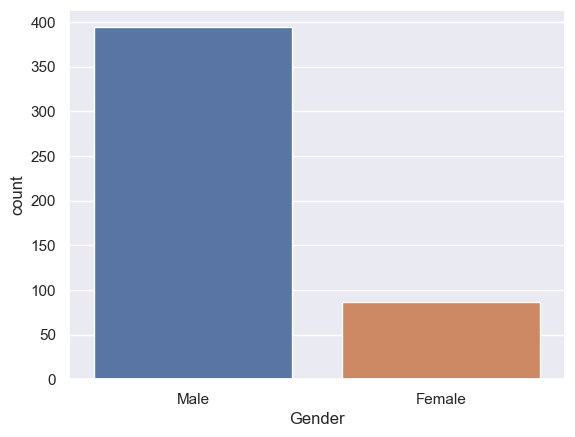

In [19]:
# count chart of gender column
sns.countplot(x="Gender", data=loan_data)

<AxesSubplot: xlabel='Education', ylabel='count'>

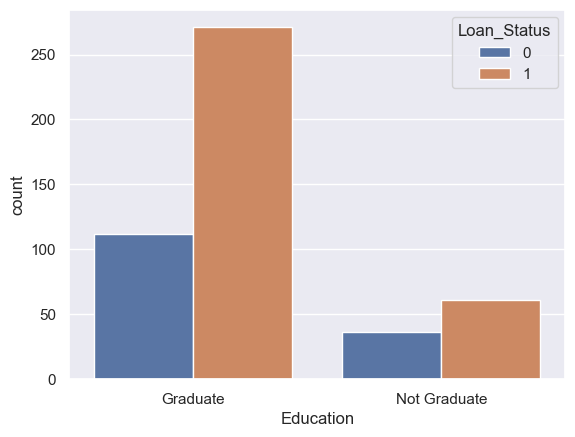

In [20]:
# count of Education with loan status classification
sns.countplot(x='Education', hue='Loan_Status', data=loan_data)

<AxesSubplot: xlabel='Married', ylabel='count'>

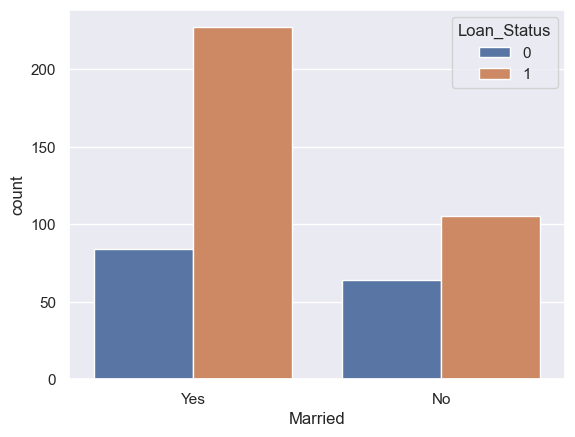

In [21]:
# count of marrital status with gender classification
sns.countplot(x="Married", hue="Loan_Status", data=loan_data)

<AxesSubplot: xlabel='Gender', ylabel='count'>

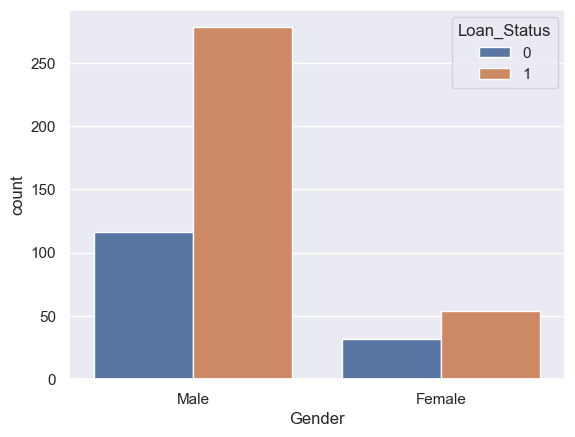

In [22]:
# count of loan status with gender classification
sns.countplot(x="Gender", hue="Loan_Status", data=loan_data)

In [23]:
# converting categorial values
loan_data.replace({'Married': {"No": 0, "Yes": 1}, 'Gender': {'Male': 1, 'Female': 0}, 'Education': {'Not Graduate': 0, 'Graduate': 1},
                   'Self_Employed': {'No': 0, 'Yes': 1}, 'Property_Area': {'Rural': 0, 'Semiurban': 1, 'Urban': 2}}, inplace=True)

In [24]:
loan_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2,1


In [25]:
loan_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#### Splitting data into Features and Target

In [26]:
X = loan_data.drop(columns=['Loan_ID', 'Loan_Status'], axis=1)
Y = loan_data['Loan_Status']

In [27]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2


In [28]:
Y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64

#### Splitting data into Train and Test data

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [68]:
print(X.shape, X_train.shape, X_test.shape)
print(X_train.iloc[0, :])

(480, 11) (384, 11) (96, 11)
Gender                    1
Married                   1
Dependents                2
Education                 1
Self_Employed             1
ApplicantIncome        2500
CoapplicantIncome    4600.0
LoanAmount            176.0
Loan_Amount_Term      360.0
Credit_History          1.0
Property_Area             0
Name: 337, dtype: object


#### Training the Model

##### Support Vector Machine from Scratch

In [154]:
class SVM():
    def __init__(self, alpha=0.001, lp=0.01, iters=1000):
        self.alpha = alpha
        self.lp = lp # lp - lambda parameter
        self.iters = iters
        self.w = None
        self.b = None
    
    def fit(self, X, y):
        X = np.asarray(X, dtype=int)
        m, n = X.shape
        y_ = np.where(y==0, -1, 1)
        
        self.w = np.zeros(n)
        self.b = 0
        X = pd.DataFrame(X)
        
        for _ in range(self.iters):
            for i in range(m):
                if y_[i]*(np.dot(X.iloc[i, :], self.w) - self.b) >= 1:
                    self.w -= self.alpha*(2*self.lp*self.w)
                else:
                    self.w -= self.alpha*((2*self.lp*self.w).T- np.dot(X.iloc[i, :], y_[i]))
                    self.b -= self.alpha*y_[i]
            
    
    def predict(self, X):
        X = np.asarray(X, dtype=float)
        X = pd.DataFrame(X)
        h_wb = np.dot(X, self.w) - self.b
        return np.sign(h_wb)

In [155]:
classifier = SVM()
classifier.fit(X_train, Y_train)

##### Support Vector Machine

In [32]:
# we need to classify so we are using support vector classifier
# classifier = svm.SVC(kernel='linear')

In [33]:
# training the support vector machine model
# classifier.fit(X_train, Y_train)

##### Logistic Regression

In [34]:
# model = LogisticRegression()
# model.fit(X_train, Y_train)

#### Accuracy Score

##### Support Vector Machine

In [156]:
# finding accuracy on Training data
Y_train_cap = classifier.predict(X_train)
acc_train = accuracy_score(Y_train_cap, Y_train)

In [157]:
print("Accuracy on Training data:", acc_train)

Accuracy on Training data: 0.6901041666666666


In [158]:
# finding accuracy on Training data
Y_test_cap = classifier.predict(X_test)
acc_test = accuracy_score(Y_test_cap, Y_test)

In [159]:
print("Accuracy on Testing data:", acc_test)

Accuracy on Testing data: 0.6770833333333334


##### Logistic Regression

In [ ]:
# # finding accuracy on Training data
# Y_train_cap = model.predict(X_train)
# acc_train = accuracy_score(Y_train_cap, Y_train)

In [ ]:
# print("Accuracy on Training data:", acc_train)

In [ ]:
# # finding accuracy on Training data
# Y_test_cap = model.predict(X_test)
# acc_test = accuracy_score(Y_test_cap, Y_test)

In [ ]:
# print("Accuracy on Testing data:", acc_test)

#### Loan Prediction System

In [ ]:
loan_input = (1,1,0,0,0,2600,1911,116,360,0,2)

input_array = np.asarray(loan_input)

input_array_reshape = input_array.reshape(1, -1)

prediction = classifier.predict(input_array_reshape)

if prediction[0] == 0: 
    print("Sorry! You will not get a Loan")
else:
    print("You will get a Loan")